<img src="images/GMIT logo.jpeg" width="800" align="center">

# GMIT simulated dataset

## Roisin Fallon

### Table of Contents

[ Python Libraries ](#lib)
[ Variables](#var)
   * [Age](#age)
   * [ Gender ](#gender)
   * [ Grade ](#grade)
   * [Course Type](#type)
   * [ Hours spent studying ](#study)
   * [ GMIT moodle logon ](#moodle)
   
[Simulation  of the Dataset](#sim)

[Conclusion](#con)

[Bibliography](#bib)

<a name="lib"></a>
## Python Libraries

In [318]:
# Import the libraries
import numpy as np
import pandas as pd


# Visualisation library
import seaborn as sns
# current version of seaborn creates warnings this will remove them
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
# To plot the graph embedded in the notebook
%matplotlib inline

import scipy.stats as stats
from scipy import stats

import random


# Standardise the size of the plots throughout this project
plt.rcParams['figure.figsize'] = (20, 17)
sns.set_style("whitegrid")

<a name="grade"></a>

## Generate random values for percent variable

Normal distribution is a better way to distribute the data for marks.

In [327]:
# Normal distribution of grades

# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(123456)

# Mean grade is 55% 
percent = np.random.normal(55, 14, 1000). round(2) 
# print(percent)

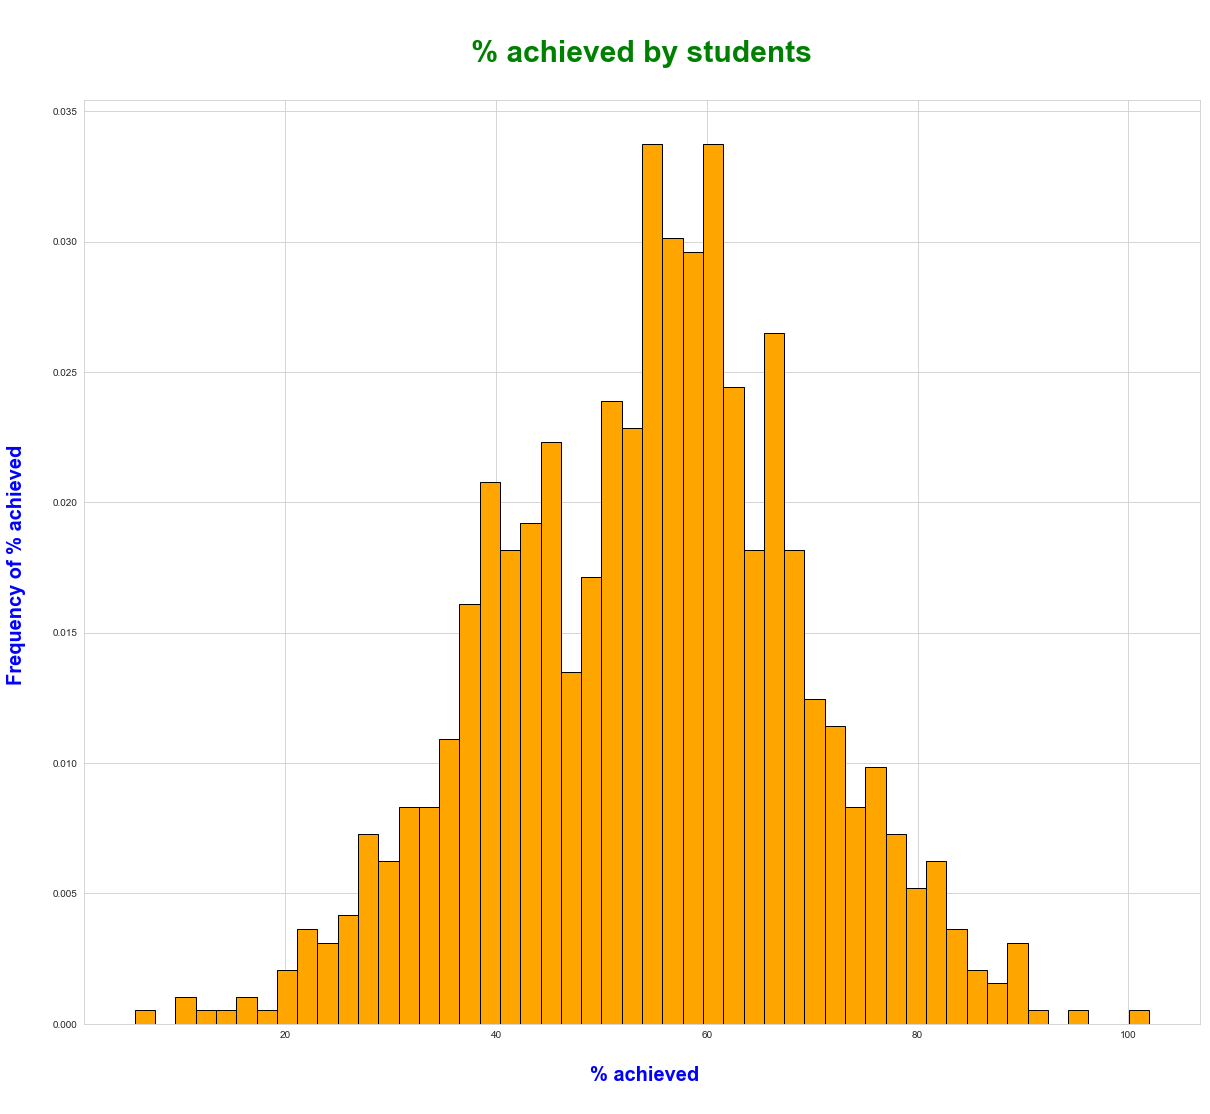

In [328]:

plt.hist(percent, bins= 50, density=True, facecolor='orange', color='b', edgecolor='black', linewidth=1)

# Format the plot
plt.ylabel("Frequency of % achieved \n", fontweight="bold", fontsize="20", color="b")  
plt.xlabel("\n  % achieved \n", fontweight="bold", fontsize="20", color="b")    
plt.title("\n % achieved by students \n", fontweight="bold", fontsize="30", color="g")
plt.show()

<a name="job"></a>
## Generate random variable for number for GMIT log in

A Poisson distribution applies whenever you count events occurring per unit time

In [329]:
from scipy.stats import poisson

In [330]:
# Adapted from: https://www.quora.com/What-is-the-real-life-example-of-Poisson-distribution
np.random.seed(123456)


moodle_login = np.random.poisson.rvs(10,40, 1000)
# print(moodle_login)

AttributeError: 'builtin_function_or_method' object has no attribute 'rvs'

In [ ]:
plt.hist(moodle_login, bins= 50, density=True, facecolor='orange', color='b', edgecolor='black', linewidth=1)

# Format the plot
plt.ylabel("Count of people logged in \n", fontweight="bold", fontsize="20", color="b")  
plt.xlabel("\n  Number of moodle login \n", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Number of people who login to the Moodle GMIT page \n", fontweight="bold", fontsize="30", color="g")
plt.show()

<a name="type"></a>
## Course Type: Full Time vs Part time Course

In [369]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(123456) 
course_type = np.random.binomial(1, 0.6, 1000)

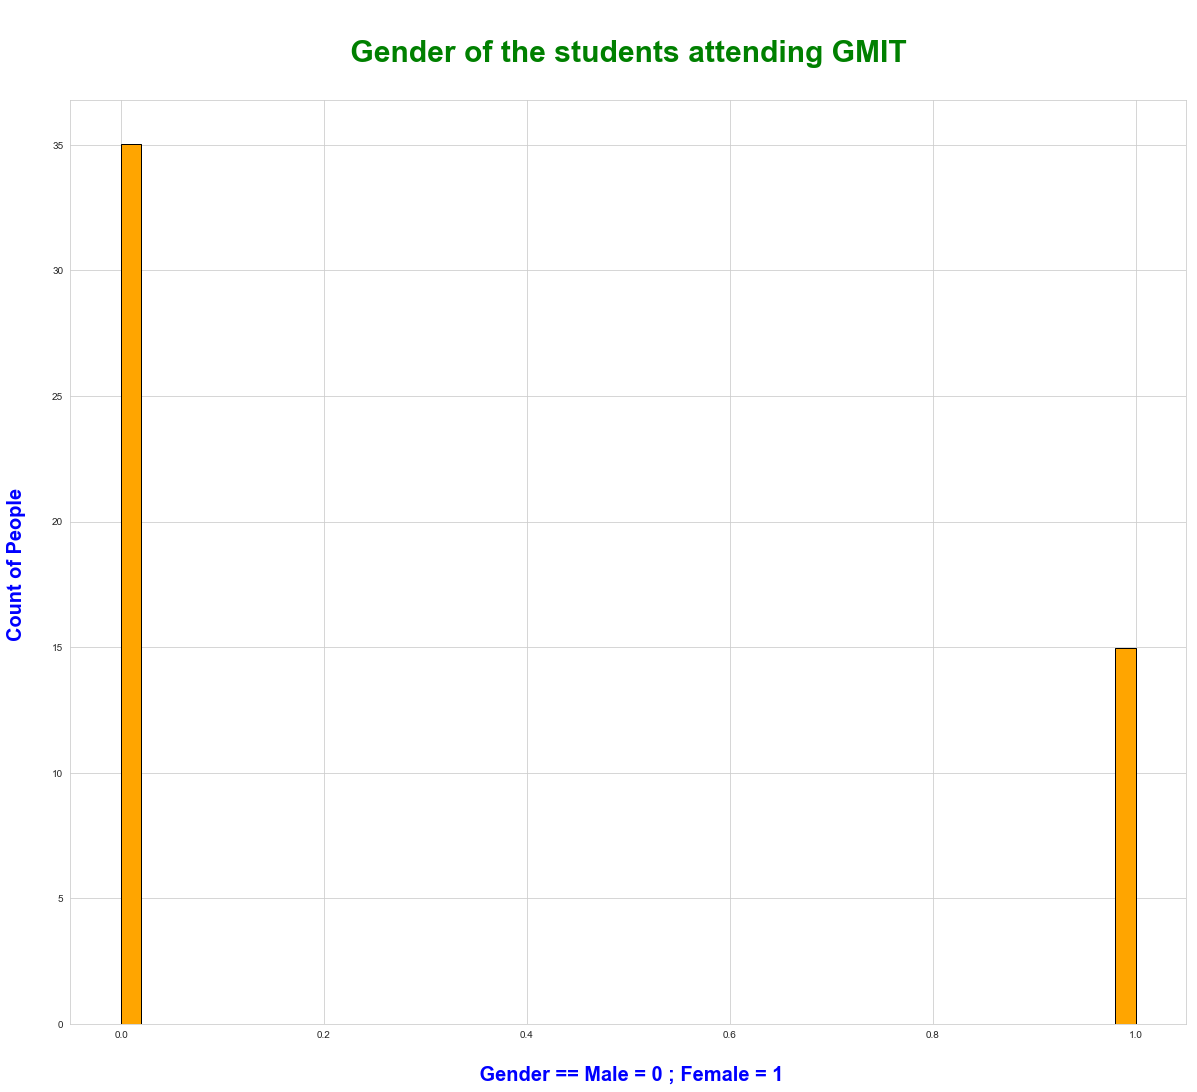

In [366]:
plt.hist(course_type, bins= 50, density=True, facecolor='orange', color='b', edgecolor='black', linewidth=1)

# Format the plot
plt.ylabel("Count of People \n", fontweight="bold", fontsize="20", color="b")  
plt.xlabel("\n Gender == Male = 0 ; Female = 1", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Gender of the students attending GMIT \n", fontweight="bold", fontsize="30", color="g")
plt.show()

<a name="study"></a>
## Generate random values for hours spent studying per week

In [359]:
# Prople studying full time

full_hours_study = np.random.normal(25, 4, 500).round(2) 
# print(full_hours_study)

# People studying part time 

part_hours_study = np.random.normal(15, 4, 500).round(2) 
# print(part_hours_study)

study_hours = np.concatenate((full_hours_study, part_hours_study), axis = None)

# print(study_hours)

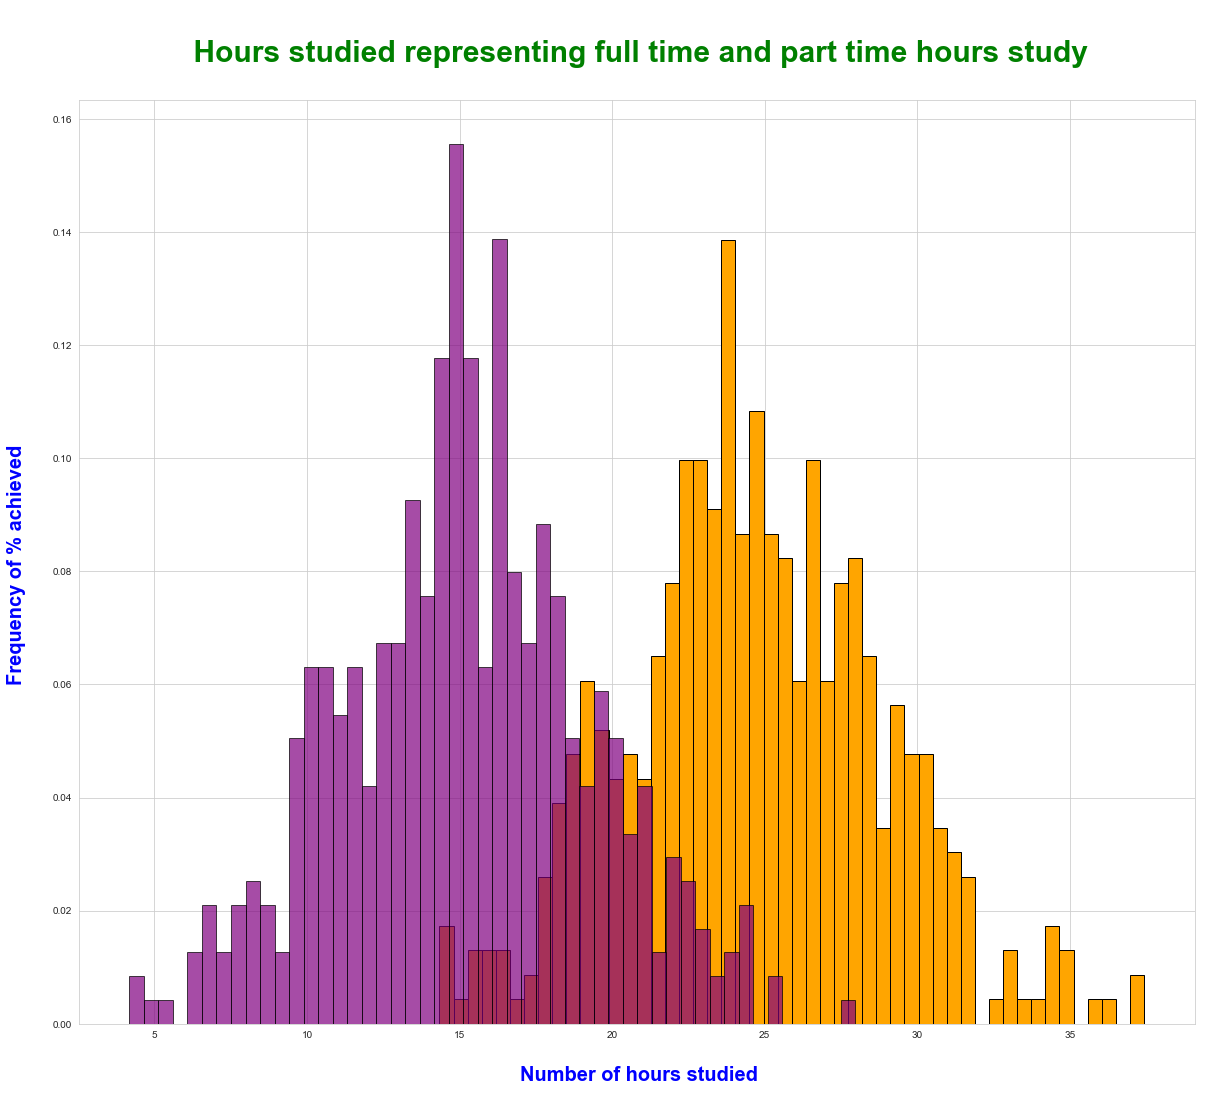

In [360]:

plt.hist(full_hours_study, bins= 50, density=True, facecolor='orange', color='b', edgecolor='black', linewidth=1)
plt.hist(part_hours_study, bins= 50, density=True, facecolor='purple', color='b', edgecolor='black', linewidth=1, alpha=0.7)
# Format the plot
plt.ylabel("Frequency of % achieved \n", fontweight="bold", fontsize="20", color="b")  
plt.xlabel("\n  Number of hours studied \n", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Hours studied representing full time and part time hours study\n", fontweight="bold", fontsize="30", color="g")
plt.show()

<a name="sim"></a>
## Data Simulation

In [435]:
df = pd.DataFrame(data={"studentID": studentID, "Age" : age, "Gender": gender, "% Achieved": percent ,"Result Achieved": result,
                               "Study hours":study_hours, "Course Type" : course_type})

df ['Gender'].replace({0:'Male', 1:'Female'}, inplace=True)

df ['Course Type'].replace({0:'Part Time', 1:'Full Time'}, inplace=True)

# https://www.scholaro.com/pro/countries/Ireland/Grading-System
def result(percent):
    if (percent >= 70.00) & (percent <= 100.00 ):
        return "First Class Honours"
    elif (percent >= 60.00) & (percent <= 69.99):
        return "Upper Second Class (2.1) Honors"
    elif (percent >= 50.00) & (percent <= 59.99):
        return "Lower Second Class (2.2) Honors"
    elif (percent >= 40.00) & (percent <= 49.99):
        return "Class 3 Honors/Pass "
    else:
        return "Fail"

vfunction = np.vectorize(result)
result = vfunction(df["% Achieved"])  
df["Result Achieved"]=result 

# Create a studentID
id = 1
for x in range(1, 1001):
    studentID = "G00 {}".format(id)
    id += 1
print(studentID)

G00 1000
